In [269]:
import numpy as np 
import pandas as pd 

print("Libraries installed.")

Libraries installed.


In [270]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_townships/cities_and_districts_in_Taiwan')[0]
df

Code            Part of           English name Native name  \
0    65000010    New Taipei City       Banqiao District         板橋區   
1    65000020    New Taipei City      Sanchong District         三重區   
2    65000030    New Taipei City       Zhonghe District         中和區   
3    65000040    New Taipei City        Yonghe District         永和區   
4    65000050    New Taipei City     Xinzhuang District         新莊區   
5    65000060    New Taipei City       Xindian District         新店區   
6    65000070    New Taipei City        Shulin District         樹林區   
7    65000080    New Taipei City        Yingge District         鶯歌區   
8    65000090    New Taipei City        Sanxia District         三峽區   
9    65000100    New Taipei City        Tamsui District         淡水區   
10   65000110    New Taipei City         Xizhi District         汐止區   
11   65000120    New Taipei City       Ruifang District         瑞芳區   
12   65000130    New Taipei City       Tucheng District         土城區   
13   65000140    New Taipei City        Luzhou District         蘆洲區   
14   65000150    New Taipei City          Wugu District         五股區   
15   65000160    New Taipei City       Taishan District         泰山區   
16   65000170    New Taipei City        Linkou District         林口區   
17   65000180    New Taipei City      Shenkeng District         深坑區   
18   65000190    New Taipei City       Shiding District         石碇區   
19   65000200    New Taipei City       Pinglin District         坪林區   
20   65000210    New Taipei City        Sanzhi District         三芝區   
21   65000220    New Taipei City        Shimen District         石門區   
22   65000230    New Taipei City          Bali District         八里區   
23   65000240    New Taipei City        Pingxi District         平溪區   
24   65000250    New Taipei City      Shuangxi District         雙溪區   
25   65000260    New Taipei City      Gongliao District         貢寮區   
26   65000270    New Taipei City       Jinshan District         金山區   
27   65000280    New Taipei City         Wanli District         萬里區   
28   65000290    New Taipei City         Wulai District         烏來區   
29   63000010        Taipei City      Songshan District         松山區   
30   63000020        Taipei City         Xinyi District         信義區   
31   63000030        Taipei City          Daan District         大安區   
32   63000040        Taipei City     Zhongshan District         中山區   
33   63000050        Taipei City    Zhongzheng District         中正區   
34   63000060        Taipei City        Datong District         大同區   
35   63000070        Taipei City        Wanhua District         萬華區   
36   63000080        Taipei City       Wenshan District         文山區   
37   63000090        Taipei City       Nangang District         南港區   
38   63000100        Taipei City         Neihu District         內湖區   
39   63000110        Taipei City        Shilin District         士林區   
40   63000120        Taipei City        Beitou District         北投區   
41   68000010       Taoyuan City       Taoyuan District         桃園區   
42   68000020       Taoyuan City       Zhongli District         中壢區   
43   68000030       Taoyuan City          Daxi District         大溪區   
44   68000040       Taoyuan City       Yangmei District         楊梅區   
45   68000050       Taoyuan City         Luzhu District         蘆竹區   
46   68000060       Taoyuan City        Dayuan District         大園區   
47   68000070       Taoyuan City       Guishan District         龜山區   
48   68000080       Taoyuan City          Bade District         八德區   
49   68000090       Taoyuan City       Longtan District         龍潭區   
50   68000100       Taoyuan City      Pingzhen District         平鎮區   
51   68000110       Taoyuan City         Xinwu District         新屋區   
52   68000120       Taoyuan City       Guanyin District         觀音區   
53   68000130       Taoyuan City        Fuxing District         復興區   
54   66000010      Taichung City       Central District          中區   
55   66000020      Taichung City 

In [271]:
df.drop("Population density (/km2)", axis=1, inplace=True)
df.drop("Population 2010[b]", axis=1, inplace=True)
df.drop("Population change[c]", axis=1, inplace=True)
df.drop("Native name", axis=1, inplace=True)
df.drop("Code", axis=1, inplace=True)

In [272]:
df.head()

Part of        English name      Type  Population[a]  Area(km2)
0  New Taipei City    Banqiao District  District         557120      23.14
1  New Taipei City   Sanchong District  District         386236      16.32
2  New Taipei City    Zhonghe District  District         413067      20.14
3  New Taipei City     Yonghe District  District         220619       5.71
4  New Taipei City  Xinzhuang District  District         420684      19.74

In [273]:
df.shape

(368, 5)

In [274]:
from geopy.geocoders import Nominatim

In [275]:
geolocator = Nominatim(user_agent="Taiwan")

df['Major_Dist_Coord']= df['Part of'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

Part of           English name           Type  Population[a]  \
0      New Taipei City       Banqiao District       District         557120   
1      New Taipei City      Sanchong District       District         386236   
2      New Taipei City       Zhonghe District       District         413067   
3      New Taipei City        Yonghe District       District         220619   
4      New Taipei City     Xinzhuang District       District         420684   
5      New Taipei City       Xindian District       District         303624   
6      New Taipei City        Shulin District       District         183906   
7      New Taipei City        Yingge District       District          86945   
8      New Taipei City        Sanxia District       District         116587   
9      New Taipei City        Tamsui District       District         179036   
10     New Taipei City         Xizhi District       District         203621   
11     New Taipei City       Ruifang District       District          39495   
12     New Taipei City       Tucheng District       District         237762   
13     New Taipei City        Luzhou District       District         202026   
14     New Taipei City          Wugu District       District          88165   
15     New Taipei City       Taishan District       District          78731   
16     New Taipei City        Linkou District       District         116000   
17     New Taipei City      Shenkeng District       District          23714   
18     New Taipei City       Shiding District       District           7622   
19     New Taipei City       Pinglin District       District           6698   
20     New Taipei City        Sanzhi District       District          22721   
21     New Taipei City        Shimen District       District          11816   
22     New Taipei City          Bali District       District          39555   
23     New Taipei City        Pingxi District       District           4533   
24     New Taipei City      Shuangxi District       District           8632   
25     New Taipei City      Gongliao District       District          12006   
26     New Taipei City       Jinshan District       District          21377   
27     New Taipei City         Wanli District       District          21840   
28     New Taipei City         Wulai District    District[d]           6434   
29         Taipei City      Songshan District       District         204043   
30         Taipei City         Xinyi District       District         219744   
31         Taipei City          Daan District       District         307526   
32         Taipei City     Zhongshan District       District         227266   
33         Taipei City    Zhongzheng District       District         157743   
34         Taipei City        Datong District       District         125909   
35         Taipei City        Wanhua District       District         186848   
36         Taipei City       Wenshan District       District         271674   
37         Taipei City       Nangang District       District         120161   
38         Taipei City         Neihu District       District         285526   
39         Taipei City        Shilin District       District         283282   
40         Taipei City        Beitou District       District         253155   
41        Taoyuan City       Taoyuan District       District         453275   
42        Taoyuan City       Zhongli District       District         417671   
43        Taoyuan City          Daxi District       District          95576   
44        Taoyuan City       Yangmei District       District         173252   
45        Taoyuan City         Luzhu District       District         166497   
46        Taoyuan City        Dayuan District       District          93087   
47        Taoyuan City       Guishan District       District         163082   
48        Taoyuan City          Bade District       District         206409   
49        Taoyuan City       Longtan District       District     

In [276]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [277]:
address = 'Taiwan'

geolocator = Nominatim(user_agent="Taiwan")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taiwan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Taiwan are 23.9739374, 120.9820179.


In [278]:
# create map of Cologne using latitude and longitude 
map_Taiwan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Part of']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Taiwan) 
    
map_Taiwan

In [279]:
CLIENT_ID = "AQ5RCDARXWRSHMADWW2EQBRRWLXOIGDHJAJ21T13GLI5ETQJ"
CLIENT_SECRET = "E0V0HGYPTBLJOG2ZBT0H2F4LGXJIDDSN02GRA4FV1T1UN1NS"
VERSION = "20180605"

In [280]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Part of'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of New Taipei City are 25.072134249999998, 121.67991896754117.


In [281]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AQ5RCDARXWRSHMADWW2EQBRRWLXOIGDHJAJ21T13GLI5ETQJ&client_secret=E0V0HGYPTBLJOG2ZBT0H2F4LGXJIDDSN02GRA4FV1T1UN1NS&v=20180605&ll=25.072134249999998,121.67991896754117&radius=600&limit=15'

In [282]:
results = requests.get(url).json()

In [283]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [284]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-284-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name         categories        lat         lng
0  7-Eleven  Convenience Store  25.074642  121.682640
1     全家大同店  Convenience Store  25.073885  121.677472
2   笑咪咪包子饅頭     Breakfast Spot  25.074955  121.683584

In [285]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


In [286]:
print (nearby_venues['categories'].value_counts()[0:15])

Convenience Store    2
Breakfast Spot       1
Name: categories, dtype: int64


In [287]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [288]:
Taiwan_venues = getNearbyVenues(names=df['Part of'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
New Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taipei City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taoyuan City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City
Taichung City

In [289]:
Taiwan_venues.shape

(10511, 7)

In [290]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Taiwan_Venues_only_restaurant = Taiwan_venues[Taiwan_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Taiwan_Venues_only_restaurant.index = np.arange(1, len(Taiwan_Venues_only_restaurant )+1)

In [291]:
print(Taiwan_Venues_only_restaurant['Venue Category'].value_counts())

Taiwanese Restaurant             855
Chinese Restaurant               434
Fast Food Restaurant             321
Japanese Restaurant              253
Seafood Restaurant               211
Dumpling Restaurant              193
Asian Restaurant                 144
Italian Restaurant                82
Hotpot Restaurant                 72
Restaurant                        56
Sushi Restaurant                  51
Dim Sum Restaurant                38
Indian Restaurant                 37
Middle Eastern Restaurant         37
Vegetarian / Vegan Restaurant     36
American Restaurant               19
Mexican Restaurant                16
Hakka Restaurant                  16
Moroccan Restaurant               12
Hong Kong Restaurant              12
Korean Restaurant                 12
Shabu-Shabu Restaurant            12
Modern European Restaurant        12
Yunnan Restaurant                 12
Ramen Restaurant                   3
Tapas Restaurant                   3
Name: Venue Category, dtype: int64


In [292]:
print(F"There are {len(Taiwan_Venues_only_restaurant['Venue Category'].unique())} unique categories.")

There are 26 unique categories.


In [293]:
# create a dataframe of top 20 categories
Taiwan_Venues_Top20 = Taiwan_Venues_only_restaurant['Venue Category'].value_counts()[0:20].to_frame(name='frequency')
Taiwan_Venues_Top20 = Taiwan_Venues_Top20.reset_index()
Taiwan_Venues_Top20.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Taiwan_Venues_Top20

Venue_Category  Frequency
0            Taiwanese Restaurant        855
1              Chinese Restaurant        434
2            Fast Food Restaurant        321
3             Japanese Restaurant        253
4              Seafood Restaurant        211
5             Dumpling Restaurant        193
6                Asian Restaurant        144
7              Italian Restaurant         82
8               Hotpot Restaurant         72
9                      Restaurant         56
10               Sushi Restaurant         51
11             Dim Sum Restaurant         38
12              Indian Restaurant         37
13      Middle Eastern Restaurant         37
14  Vegetarian / Vegan Restaurant         36
15            American Restaurant         19
16             Mexican Restaurant         16
17               Hakka Restaurant         16
18            Moroccan Restaurant         12
19           Hong Kong Restaurant         12

In [294]:
!pip install seaborn

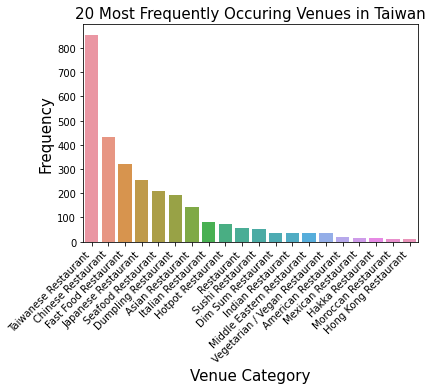

<Figure size 1296x504 with 0 Axes>

In [295]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Taiwan_Venues_Top20)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('20 Most Frequently Occuring Venues in Taiwan', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
fig = plt.figure(figsize=(18,7))
plt.show()

In [296]:
Taiwan_Venues_only_restaurant

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1     New Taipei City              25.072134              121.679919   
2     New Taipei City              25.072134              121.679919   
3     New Taipei City              25.072134              121.679919   
4     New Taipei City              25.072134              121.679919   
5     New Taipei City              25.072134              121.679919   
6     New Taipei City              25.072134              121.679919   
7     New Taipei City              25.072134              121.679919   
8     New Taipei City              25.072134              121.679919   
9     New Taipei City              25.072134              121.679919   
10    New Taipei City              25.072134              121.679919   
11    New Taipei City              25.072134              121.679919   
12    New Taipei City              25.072134              121.679919   
13    New Taipei City              25.072134              121.679919   
14    New Taipei City              25.072134              121.679919   
15    New Taipei City              25.072134              121.679919   
16    New Taipei City              25.072134              121.679919   
17    New Taipei City              25.072134              121.679919   
18    New Taipei City              25.072134              121.679919   
19    New Taipei City              25.072134              121.679919   
20    New Taipei City              25.072134              121.679919   
21    New Taipei City              25.072134              121.679919   
22    New Taipei City              25.072134              121.679919   
23    New Taipei City              25.072134              121.679919   
24    New Taipei City              25.072134              121.679919   
25    New Taipei City              25.072134              121.679919   
26    New Taipei City              25.072134              121.679919   
27    New Taipei City              25.072134              121.679919   
28    New Taipei City              25.072134              121.679919   
29    New Taipei City              25.072134              121.679919   
30    New Taipei City              25.072134              121.679919   
31    New Taipei City              25.072134              121.679919   
32    New Taipei City              25.072134              121.679919   
33    New Taipei City              25.072134              121.679919   
34    New Taipei City              25.072134              121.679919   
35    New Taipei City              25.072134              121.679919   
36    New Taipei City              25.072134              121.679919   
37    New Taipei City              25.072134              121.679919   
38    New Taipei City              25.072134              121.679919   
39    New Taipei City              25.072134              121.679919   
40    New Taipei City              25.072134              121.679919   
41    New Taipei City              25.072134              121.679919   
42    New Taipei City              25.072134              121.679919   
43    New Taipei City              25.072134              121.679919   
44    New Taipei City              25.072134              121.679919   
45    New Taipei City              25.072134              121.679919   
46    New Taipei City              25.072134              121.679919   
47    New Taipei City              25.072134              121.679919   
48    New Taipei City              25.072134              121.679919   
49    New Taipei City              25.072134              121.679919   
50    New Taipei City              25.072134              121.679919   
51    New Taipei City              25.072134              121.679919   
52    New Taipei City              25.072134              121.679919   
53    New Taipei City              25.072134              121.679919   
54    New Taipei City              25.072134              121.679919   
55    New Taipei City              25.072134     

In [297]:
Taiwan_Venues_restaurant = Taiwan_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [298]:
Taiwan_Venues_restaurant

Neighborhood
Changhua County     208
Hsinchu City         51
Hsinchu County      208
Hualien County      182
Kaohsiung City      190
Keelung City         35
Kinmen County         6
Nantou County        26
New Taipei City      58
Pingtung County      66
Tainan City        1110
Taipei City         384
Taitung County      112
Taoyuan City        169
Yilan County         84
Yunlin County        60
Name: Venue Category, dtype: int64

In [299]:
Taiwan_Venues_restaurant_df  = Taiwan_Venues_restaurant.to_frame().reset_index()
Taiwan_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Taiwan_Venues_restaurant_df.index = np.arange(1, len(Taiwan_Venues_restaurant_df)+1)
list_rest_no = Taiwan_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Taiwan_Venues_restaurant_df['Neighborhood'].to_list()


In [300]:
# one hot encoding
Taiwan_onehot = pd.get_dummies(Taiwan_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Taiwan_onehot['Neighborhood'] = Taiwan_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Taiwan_onehot.columns[-1]] + list(Taiwan_onehot.columns[:-1])
Taiwan_onehot = Taiwan_onehot[fixed_columns]

Taiwan_onehot.head()

Neighborhood  American Restaurant  Asian Restaurant  Chinese Restaurant  \
1  New Taipei City                    0                 0                   0   
2  New Taipei City                    0                 0                   0   
3  New Taipei City                    0                 0                   0   
4  New Taipei City                    0                 0                   0   
5  New Taipei City                    0                 0                   0   

   Dim Sum Restaurant  Dumpling Restaurant  Fast Food Restaurant  \
1                   0                    0                     1   
2                   0                    1                     0   
3                   0                    0                     1   
4                   0                    1                     0   
5                   0                    0                     1   

   Hakka Restaurant  Hong Kong Restaurant  Hotpot Restaurant  \
1                 0                     0                  0   
2                 0                     0                  0   
3                 0                     0                  0   
4                 0                     0                  0   
5                 0                     0                  0   

   Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   
5                  0                   0                    0   

   Korean Restaurant  Mexican Restaurant  Middle Eastern Restaurant  \
1                  0                   0                          0   
2                  0                   0                          0   
3                  0                   0                          0   
4                  0                   0                          0   
5                  0                   0                          0   

   Modern European Restaurant  Moroccan Restaurant  Ramen Restaurant  \
1                           0                    0                 0   
2                           0                    0                 0   
3                           0                    0                 0   
4                           0                    0                 0   
5                           0                    0                 0   

   Restaurant  Seafood Restaurant  Shabu-Shabu Restaurant  Sushi Restaurant  \
1           0                   0                       0                 0   
2           0                   0                       0                 0   
3           0                   0                       0                 0   
4           0                   0                       0                 0   
5           0                   0                       0                 0   

   Taiwanese Restaurant  Tapas Restaurant  Vegetarian / Vegan Restaurant  \
1                     0                 0                              0   
2                     0                 0                              0   
3                     0                 0                              0   
4                     0                 0                              0   
5                     0                 0                              0   

   Yunnan Restaurant  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0

In [301]:
Taiwan_onehot.shape

(2949, 27)

In [302]:
Taiwan_grouped = Taiwan_onehot.groupby('Neighborhood').mean().reset_index()
Taiwan_grouped

Neighborhood  American Restaurant  Asian Restaurant  \
0   Changhua County             0.000000          0.000000   
1      Hsinchu City             0.117647          0.117647   
2    Hsinchu County             0.000000          0.000000   
3    Hualien County             0.000000          0.142857   
4    Kaohsiung City             0.000000          0.000000   
5      Keelung City             0.000000          0.000000   
6     Kinmen County             0.000000          0.000000   
7     Nantou County             0.000000          0.500000   
8   New Taipei City             0.000000          0.000000   
9   Pingtung County             0.000000          0.000000   
10      Tainan City             0.000000          0.033333   
11      Taipei City             0.000000          0.000000   
12   Taitung County             0.000000          0.000000   
13     Taoyuan City             0.076923          0.153846   
14     Yilan County             0.000000          0.428571   
15    Yunlin County             0.000000          0.000000   

    Chinese Restaurant  Dim Sum Restaurant  Dumpling Restaurant  \
0             0.375000                 0.0             0.250000   
1             0.235294                 0.0             0.000000   
2             0.187500                 0.0             0.000000   
3             0.285714                 0.0             0.142857   
4             0.000000                 0.2             0.200000   
5             0.400000                 0.0             0.000000   
6             0.000000                 0.0             0.000000   
7             0.000000                 0.0             0.000000   
8             0.000000                 0.0             0.500000   
9             0.000000                 0.0             0.000000   
10            0.100000                 0.0             0.000000   
11            0.093750                 0.0             0.125000   
12            0.142857                 0.0             0.000000   
13            0.307692                 0.0             0.000000   
14            0.285714                 0.0             0.000000   
15            0.000000                 0.0             0.000000   

    Fast Food Restaurant  Hakka Restaurant  Hong Kong Restaurant  \
0               0.000000          0.000000               0.00000   
1               0.000000          0.058824               0.00000   
2               0.125000          0.062500               0.00000   
3               0.142857          0.000000               0.00000   
4               0.400000          0.000000               0.00000   
5               0.000000          0.000000               0.00000   
6               0.000000          0.000000               0.00000   
7               0.500000          0.000000               0.00000   
8               0.500000          0.000000               0.00000   
9               0.500000          0.000000               0.00000   
10              0.000000          0.000000               0.00000   
11              0.000000          0.000000               0.03125   
12              0.285714          0.000000               0.00000   
13              0.153846          0.000000               0.00000   
14              0.000000          0.000000               0.00000   
15              1.000000          0.000000               0.00000   

    Hotpot Restaurant  Indian Restaurant  Italian Restaurant  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.058824   
2            0.062500           0.000000            0.125000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
5            0.000000           0.000000            0.000000   
6            0.000000           0.000000            0.000000   
7            0.000000           0.000000            0.000000   
8            0.000000           0.000000            0.000000   
9            0.

In [303]:
num_top_venues = 20

for hood in Taiwan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Taiwan_grouped[Taiwan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Changhua County----
                            venue  freq
0              Chinese Restaurant  0.38
1             Dumpling Restaurant  0.25
2             Japanese Restaurant  0.25
3            Taiwanese Restaurant  0.12
4             American Restaurant  0.00
5      Modern European Restaurant  0.00
6   Vegetarian / Vegan Restaurant  0.00
7                Tapas Restaurant  0.00
8                Sushi Restaurant  0.00
9          Shabu-Shabu Restaurant  0.00
10             Seafood Restaurant  0.00
11                     Restaurant  0.00
12               Ramen Restaurant  0.00
13            Moroccan Restaurant  0.00
14             Mexican Restaurant  0.00
15      Middle Eastern Restaurant  0.00
16               Asian Restaurant  0.00
17              Korean Restaurant  0.00
18             Italian Restaurant  0.00
19              Indian Restaurant  0.00


----Hsinchu City----
                            venue  freq
0              Chinese Restaurant  0.24
1            Taiwanese Restaurant

In [304]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [305]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Taiwan_grouped['Neighborhood']

for ind in np.arange(Taiwan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Taiwan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Changhua County    Chinese Restaurant   Dumpling Restaurant   
1      Hsinchu City    Chinese Restaurant  Taiwanese Restaurant   
2    Hsinchu County    Chinese Restaurant   Japanese Restaurant   
3    Hualien County    Chinese Restaurant   Dumpling Restaurant   
4    Kaohsiung City  Fast Food Restaurant    Dim Sum Restaurant   
5      Keelung City    Chinese Restaurant    Seafood Restaurant   
6     Kinmen County            Restaurant   American Restaurant   
7     Nantou County  Fast Food Restaurant      Asian Restaurant   
8   New Taipei City   Dumpling Restaurant  Fast Food Restaurant   
9   Pingtung County  Fast Food Restaurant     Hotpot Restaurant   
10      Tainan City  Taiwanese Restaurant    Seafood Restaurant   
11      Taipei City  Taiwanese Restaurant   Dumpling Restaurant   
12   Taitung County  Taiwanese Restaurant  Fast Food Restaurant   
13     Taoyuan City    Chinese Restaurant  Fast Food Restaurant   
14     Yilan County      Asian Restaurant    Chinese Restaurant   
15    Yunlin County  Fast Food Restaurant   American Restaurant   

        3rd Most Common Venue          4th Most Common Venue  \
0         Japanese Restaurant           Taiwanese Restaurant   
1         American Restaurant               Asian Restaurant   
2        Fast Food Restaurant             Italian Restaurant   
3        Fast Food Restaurant           Taiwanese Restaurant   
4         Dumpling Restaurant           Taiwanese Restaurant   
5        Taiwanese Restaurant            American Restaurant   
6            Asian Restaurant  Vegetarian / Vegan Restaurant   
7         American Restaurant      Middle Eastern Restaurant   
8         American Restaurant      Middle Eastern Restaurant   
9         American Restaurant      Middle Eastern Restaurant   
10         Chinese Restaurant            Japanese Restaurant   
11        Japanese Restaurant             Chinese Restaurant   
12         Chinese Restaurant             Italian Restaurant   
13          Hotpot Restaurant               Asian Restaurant   
14       Taiwanese Restaurant             Seafood Restaurant   
15  Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   

            5th Most Common Venue          6th Most Common Venue  \
0             American Restaurant     Modern European Restaurant   
1              Italian Restaurant               Tapas Restaurant   
2                Hakka Restaurant           Taiwanese Restaurant   
3                Asian Restaurant             Mexican Restaurant   
4             American Restaurant     Modern European Restaurant   
5       Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
6                Tapas Restaurant           Taiwanese Restaurant   
7   Vegetarian / Vegan Restaurant               Tapas Restaurant   
8   Vegetarian / Vegan Restaurant               Tapas Restaurant   
9   Vegetarian / Vegan Restaurant               Tapas Restaurant   
10              Indian Restaurant                     Restaurant   
11  Vegetarian / Vegan Restaurant             Italian Restaurant   
12            American Restaurant     Modern European Restaurant   
13            American Restaurant               Sushi Restaurant   
14            American Restaurant      Middle Eastern Restaurant   
15               Tapas Restaurant           Taiwanese Restaurant   

            7th Most Common Venue       8th Most Common Venue  \
0   Vegetarian / Vegan Restaurant            Tapas Restaurant   
1                Ramen Restaurant         Japanese Restaurant   
2               Hotpot Restaurant            Sushi Restaurant   
3                Sushi Restaurant  Modern European Restaurant   
4   Vegetarian / Vegan Restaurant            Tapas Restaurant   
5                Tapas Restaurant            Sushi Restaurant   
6                Sushi Restaurant      Shabu-Shabu Restaurant   
7            Taiwanese Restaurant            Sushi Restaurant   
8            Taiwanese Restaurant   

In [306]:
ks = 5

Taiwan_grouped_clustering = Taiwan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=ks, random_state=0).fit(Taiwan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

<ipython-input-306-8fe72f414702>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Taiwan_grouped_clustering = Taiwan_grouped.drop('Neighborhood', 1)


array([1, 1, 1, 1, 2, 1, 3, 0, 2, 0])

In [307]:
Taiwan_merged = df
Taiwan_merged.head(82)

Part of         English name         Type  Population[a]  \
0   New Taipei City     Banqiao District     District         557120   
1   New Taipei City    Sanchong District     District         386236   
2   New Taipei City     Zhonghe District     District         413067   
3   New Taipei City      Yonghe District     District         220619   
4   New Taipei City   Xinzhuang District     District         420684   
5   New Taipei City     Xindian District     District         303624   
6   New Taipei City      Shulin District     District         183906   
7   New Taipei City      Yingge District     District          86945   
8   New Taipei City      Sanxia District     District         116587   
9   New Taipei City      Tamsui District     District         179036   
10  New Taipei City       Xizhi District     District         203621   
11  New Taipei City     Ruifang District     District          39495   
12  New Taipei City     Tucheng District     District         237762   
13  New Taipei City      Luzhou District     District         202026   
14  New Taipei City        Wugu District     District          88165   
15  New Taipei City     Taishan District     District          78731   
16  New Taipei City      Linkou District     District         116000   
17  New Taipei City    Shenkeng District     District          23714   
18  New Taipei City     Shiding District     District           7622   
19  New Taipei City     Pinglin District     District           6698   
20  New Taipei City      Sanzhi District     District          22721   
21  New Taipei City      Shimen District     District          11816   
22  New Taipei City        Bali District     District          39555   
23  New Taipei City      Pingxi District     District           4533   
24  New Taipei City    Shuangxi District     District           8632   
25  New Taipei City    Gongliao District     District          12006   
26  New Taipei City     Jinshan District     District          21377   
27  New Taipei City       Wanli District     District          21840   
28  New Taipei City       Wulai District  District[d]           6434   
29      Taipei City    Songshan District     District         204043   
30      Taipei City       Xinyi District     District         219744   
31      Taipei City        Daan District     District         307526   
32      Taipei City   Zhongshan District     District         227266   
33      Taipei City  Zhongzheng District     District         157743   
34      Taipei City      Datong District     District         125909   
35      Taipei City      Wanhua District     District         186848   
36      Taipei City     Wenshan District     District         271674   
37      Taipei City     Nangang District     District         120161   
38      Taipei City       Neihu District     District         285526   
39      Taipei City      Shilin District     District         283282   
40      Taipei City      Beitou District     District         253155   
41     Taoyuan City     Taoyuan District     District         453275   
42     Taoyuan City     Zhongli District     District         417671   
43     Taoyuan City        Daxi District     District          95576   
44     Taoyuan City     Yangmei District     District         173252   
45     Taoyuan City       Luzhu District     District         166497   
46     Taoyuan City      Dayuan District     District          93087   
47     Taoyuan City     Guishan District     District         163082   
48     Taoyuan City        Bade District     District         206409   
49     Taoyuan City     Longtan District     District         124040   
50     Taoyuan City    Pingzhen District     District         228519   
51     Taoyuan City       Xinwu District     District          49290   
52     Taoyuan City     Guanyin District     District          68034   
53     Taoyuan City      Fuxing District  District[d]          12222   
54    Taichung City     Central District     Distric

In [308]:
neighborhoods_venues_sorted.head(20)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Changhua County    Chinese Restaurant   Dumpling Restaurant   
1      Hsinchu City    Chinese Restaurant  Taiwanese Restaurant   
2    Hsinchu County    Chinese Restaurant   Japanese Restaurant   
3    Hualien County    Chinese Restaurant   Dumpling Restaurant   
4    Kaohsiung City  Fast Food Restaurant    Dim Sum Restaurant   
5      Keelung City    Chinese Restaurant    Seafood Restaurant   
6     Kinmen County            Restaurant   American Restaurant   
7     Nantou County  Fast Food Restaurant      Asian Restaurant   
8   New Taipei City   Dumpling Restaurant  Fast Food Restaurant   
9   Pingtung County  Fast Food Restaurant     Hotpot Restaurant   
10      Tainan City  Taiwanese Restaurant    Seafood Restaurant   
11      Taipei City  Taiwanese Restaurant   Dumpling Restaurant   
12   Taitung County  Taiwanese Restaurant  Fast Food Restaurant   
13     Taoyuan City    Chinese Restaurant  Fast Food Restaurant   
14     Yilan County      Asian Restaurant    Chinese Restaurant   
15    Yunlin County  Fast Food Restaurant   American Restaurant   

        3rd Most Common Venue          4th Most Common Venue  \
0         Japanese Restaurant           Taiwanese Restaurant   
1         American Restaurant               Asian Restaurant   
2        Fast Food Restaurant             Italian Restaurant   
3        Fast Food Restaurant           Taiwanese Restaurant   
4         Dumpling Restaurant           Taiwanese Restaurant   
5        Taiwanese Restaurant            American Restaurant   
6            Asian Restaurant  Vegetarian / Vegan Restaurant   
7         American Restaurant      Middle Eastern Restaurant   
8         American Restaurant      Middle Eastern Restaurant   
9         American Restaurant      Middle Eastern Restaurant   
10         Chinese Restaurant            Japanese Restaurant   
11        Japanese Restaurant             Chinese Restaurant   
12         Chinese Restaurant             Italian Restaurant   
13          Hotpot Restaurant               Asian Restaurant   
14       Taiwanese Restaurant             Seafood Restaurant   
15  Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   

            5th Most Common Venue          6th Most Common Venue  \
0             American Restaurant     Modern European Restaurant   
1              Italian Restaurant               Tapas Restaurant   
2                Hakka Restaurant           Taiwanese Restaurant   
3                Asian Restaurant             Mexican Restaurant   
4             American Restaurant     Modern European Restaurant   
5       Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
6                Tapas Restaurant           Taiwanese Restaurant   
7   Vegetarian / Vegan Restaurant               Tapas Restaurant   
8   Vegetarian / Vegan Restaurant               Tapas Restaurant   
9   Vegetarian / Vegan Restaurant               Tapas Restaurant   
10              Indian Restaurant                     Restaurant   
11  Vegetarian / Vegan Restaurant             Italian Restaurant   
12            American Restaurant     Modern European Restaurant   
13            American Restaurant               Sushi Restaurant   
14            American Restaurant      Middle Eastern Restaurant   
15               Tapas Restaurant           Taiwanese Restaurant   

            7th Most Common Venue       8th Most Common Venue  \
0   Vegetarian / Vegan Restaurant            Tapas Restaurant   
1                Ramen Restaurant         Japanese Restaurant   
2               Hotpot Restaurant            Sushi Restaurant   
3                Sushi Restaurant  Modern European Restaurant   
4   Vegetarian / Vegan Restaurant            Tapas Restaurant   
5                Tapas Restaurant            Sushi Restaurant   
6                Sushi Restaurant      Shabu-Shabu Restaurant   
7            Taiwanese Restaurant            Sushi Restaurant   
8            Taiwanese Restaurant   

In [309]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [310]:
neighborhoods_venues_sorted_w_clusters.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Changhua County    Chinese Restaurant   Dumpling Restaurant   
1     Hsinchu City    Chinese Restaurant  Taiwanese Restaurant   
2   Hsinchu County    Chinese Restaurant   Japanese Restaurant   
3   Hualien County    Chinese Restaurant   Dumpling Restaurant   
4   Kaohsiung City  Fast Food Restaurant    Dim Sum Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Japanese Restaurant  Taiwanese Restaurant   American Restaurant   
1   American Restaurant      Asian Restaurant    Italian Restaurant   
2  Fast Food Restaurant    Italian Restaurant      Hakka Restaurant   
3  Fast Food Restaurant  Taiwanese Restaurant      Asian Restaurant   
4   Dumpling Restaurant  Taiwanese Restaurant   American Restaurant   

        6th Most Common Venue          7th Most Common Venue  \
0  Modern European Restaurant  Vegetarian / Vegan Restaurant   
1            Tapas Restaurant               Ramen Restaurant   
2        Taiwanese Restaurant              Hotpot Restaurant   
3          Mexican Restaurant               Sushi Restaurant   
4  Modern European Restaurant  Vegetarian / Vegan Restaurant   

        8th Most Common Venue          9th Most Common Venue  \
0            Tapas Restaurant               Sushi Restaurant   
1         Japanese Restaurant             Mexican Restaurant   
2            Sushi Restaurant             Seafood Restaurant   
3  Modern European Restaurant  Vegetarian / Vegan Restaurant   
4            Tapas Restaurant               Sushi Restaurant   

   10th Most Common Venue  11th Most Common Venue 12th Most Common Venue  \
0  Shabu-Shabu Restaurant      Seafood Restaurant             Restaurant   
1        Hakka Restaurant       Indian Restaurant             Restaurant   
2              Restaurant     American Restaurant    Moroccan Restaurant   
3        Tapas Restaurant  Shabu-Shabu Restaurant     Seafood Restaurant   
4  Shabu-Shabu Restaurant      Seafood Restaurant             Restaurant   

          13th Most Common Venue 14th Most Common Venue  \
0               Ramen Restaurant    Moroccan Restaurant   
1  Vegetarian / Vegan Restaurant     Dim Sum Restaurant   
2  Vegetarian / Vegan Restaurant       Tapas Restaurant   
3                     Restaurant       Ramen Restaurant   
4               Ramen Restaurant    Moroccan Restaurant   

   15th Most Common Venue     16th Most Common Venue  \
0      Mexican Restaurant  Middle Eastern Restaurant   
1     Dumpling Restaurant           Sushi Restaurant   
2  Shabu-Shabu Restaurant           Ramen Restaurant   
3     Moroccan Restaurant        American Restaurant   
4      Mexican Restaurant  Middle Eastern Restaurant   

      17th Most Common Venue      18th Most Common Venue  \
0           Asian Restaurant           Korean Restaurant   
1     Shabu-Shabu Restaurant          Seafood Restaurant   
2         Mexican Restaurant  Modern European Restaurant   
3  Middle Eastern Restaurant           Korean Restaurant   
4           Asian Restaurant           Korean Restaurant   

      19th Most Common Venue 20th Most Common Venue  
0         Italian Restaurant      Indian Restaurant  
1       Fast Food Restaurant      Hotpot Restaurant  
2  Middle Eastern Restaurant       Asian Restaurant  
3        Japanese Restaurant     Italian Restaurant  
4        Japanese Restaurant     Italian Restaurant

In [311]:
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [312]:
neighborhoods_venues_sorted_w_clusters.head(20)

Cluster Labels     Neighborhood 1st Most Common Venue  \
0                1  Changhua County    Chinese Restaurant   
1                1     Hsinchu City    Chinese Restaurant   
2                1   Hsinchu County    Chinese Restaurant   
3                1   Hualien County    Chinese Restaurant   
4                2   Kaohsiung City  Fast Food Restaurant   
5                1     Keelung City    Chinese Restaurant   
6                3    Kinmen County            Restaurant   
7                0    Nantou County  Fast Food Restaurant   
8                2  New Taipei City   Dumpling Restaurant   
9                0  Pingtung County  Fast Food Restaurant   
10               4      Tainan City  Taiwanese Restaurant   
11               1      Taipei City  Taiwanese Restaurant   
12               4   Taitung County  Taiwanese Restaurant   
13               1     Taoyuan City    Chinese Restaurant   
14               1     Yilan County      Asian Restaurant   
15               0    Yunlin County  Fast Food Restaurant   

   2nd Most Common Venue      3rd Most Common Venue  \
0    Dumpling Restaurant        Japanese Restaurant   
1   Taiwanese Restaurant        American Restaurant   
2    Japanese Restaurant       Fast Food Restaurant   
3    Dumpling Restaurant       Fast Food Restaurant   
4     Dim Sum Restaurant        Dumpling Restaurant   
5     Seafood Restaurant       Taiwanese Restaurant   
6    American Restaurant           Asian Restaurant   
7       Asian Restaurant        American Restaurant   
8   Fast Food Restaurant        American Restaurant   
9      Hotpot Restaurant        American Restaurant   
10    Seafood Restaurant         Chinese Restaurant   
11   Dumpling Restaurant        Japanese Restaurant   
12  Fast Food Restaurant         Chinese Restaurant   
13  Fast Food Restaurant          Hotpot Restaurant   
14    Chinese Restaurant       Taiwanese Restaurant   
15   American Restaurant  Middle Eastern Restaurant   

            4th Most Common Venue          5th Most Common Venue  \
0            Taiwanese Restaurant            American Restaurant   
1                Asian Restaurant             Italian Restaurant   
2              Italian Restaurant               Hakka Restaurant   
3            Taiwanese Restaurant               Asian Restaurant   
4            Taiwanese Restaurant            American Restaurant   
5             American Restaurant      Middle Eastern Restaurant   
6   Vegetarian / Vegan Restaurant               Tapas Restaurant   
7       Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
8       Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
9       Middle Eastern Restaurant  Vegetarian / Vegan Restaurant   
10            Japanese Restaurant              Indian Restaurant   
11             Chinese Restaurant  Vegetarian / Vegan Restaurant   
12             Italian Restaurant            American Restaurant   
13               Asian Restaurant            American Restaurant   
14             Seafood Restaurant            American Restaurant   
15  Vegetarian / Vegan Restaurant               Tapas Restaurant   

            6th Most Common Venue          7th Most Common Venue  \
0      Modern European Restaurant  Vegetarian / Vegan Restaurant   
1                Tapas Restaurant               Ramen Restaurant   
2            Taiwanese Restaurant              Hotpot Restaurant   
3              Mexican Restaurant               Sushi Restaurant   
4      Modern European Restaurant  Vegetarian / Vegan Restaurant   
5   Vegetarian / Vegan Restaurant               Tapas Restaurant   
6            Taiwanese Restaurant               Sushi Restaurant   
7                Tapas Restaurant           Taiwanese Restaurant   
8                Tapas Restaurant           Taiwanese Restaurant   
9                Tapas Restaurant           Taiwanese Restaurant   
10                     Restaurant               Asian Restaurant   
11             Italian Restaurant             Seafood Res

In [313]:
Taiwan_merged.rename(columns={'Part of':'Neighborhood'}, inplace=True)

Taiwan_merged = Taiwan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Taiwan_merged.head(82)

Neighborhood         English name         Type  Population[a]  \
0   New Taipei City     Banqiao District     District         557120   
1   New Taipei City    Sanchong District     District         386236   
2   New Taipei City     Zhonghe District     District         413067   
3   New Taipei City      Yonghe District     District         220619   
4   New Taipei City   Xinzhuang District     District         420684   
5   New Taipei City     Xindian District     District         303624   
6   New Taipei City      Shulin District     District         183906   
7   New Taipei City      Yingge District     District          86945   
8   New Taipei City      Sanxia District     District         116587   
9   New Taipei City      Tamsui District     District         179036   
10  New Taipei City       Xizhi District     District         203621   
11  New Taipei City     Ruifang District     District          39495   
12  New Taipei City     Tucheng District     District         237762   
13  New Taipei City      Luzhou District     District         202026   
14  New Taipei City        Wugu District     District          88165   
15  New Taipei City     Taishan District     District          78731   
16  New Taipei City      Linkou District     District         116000   
17  New Taipei City    Shenkeng District     District          23714   
18  New Taipei City     Shiding District     District           7622   
19  New Taipei City     Pinglin District     District           6698   
20  New Taipei City      Sanzhi District     District          22721   
21  New Taipei City      Shimen District     District          11816   
22  New Taipei City        Bali District     District          39555   
23  New Taipei City      Pingxi District     District           4533   
24  New Taipei City    Shuangxi District     District           8632   
25  New Taipei City    Gongliao District     District          12006   
26  New Taipei City     Jinshan District     District          21377   
27  New Taipei City       Wanli District     District          21840   
28  New Taipei City       Wulai District  District[d]           6434   
29      Taipei City    Songshan District     District         204043   
30      Taipei City       Xinyi District     District         219744   
31      Taipei City        Daan District     District         307526   
32      Taipei City   Zhongshan District     District         227266   
33      Taipei City  Zhongzheng District     District         157743   
34      Taipei City      Datong District     District         125909   
35      Taipei City      Wanhua District     District         186848   
36      Taipei City     Wenshan District     District         271674   
37      Taipei City     Nangang District     District         120161   
38      Taipei City       Neihu District     District         285526   
39      Taipei City      Shilin District     District         283282   
40      Taipei City      Beitou District     District         253155   
41     Taoyuan City     Taoyuan District     District         453275   
42     Taoyuan City     Zhongli District     District         417671   
43     Taoyuan City        Daxi District     District          95576   
44     Taoyuan City     Yangmei District     District         173252   
45     Taoyuan City       Luzhu District     District         166497   
46     Taoyuan City      Dayuan District     District          93087   
47     Taoyuan City     Guishan District     District         163082   
48     Taoyuan City        Bade District     District         206409   
49     Taoyuan City     Longtan District     District         124040   
50     Taoyuan City    Pingzhen District     District         228519   
51     Taoyuan City       Xinwu District     District          49290   
52     Taoyuan City     Guanyin District     District          68034   
53     Taoyuan City      Fuxing District  District[d]          12222   
54    Taichung City     Central District     Di

In [314]:
Taiwan_merged.fillna(0)

Neighborhood           English name           Type  Population[a]  \
0      New Taipei City       Banqiao District       District         557120   
1      New Taipei City      Sanchong District       District         386236   
2      New Taipei City       Zhonghe District       District         413067   
3      New Taipei City        Yonghe District       District         220619   
4      New Taipei City     Xinzhuang District       District         420684   
5      New Taipei City       Xindian District       District         303624   
6      New Taipei City        Shulin District       District         183906   
7      New Taipei City        Yingge District       District          86945   
8      New Taipei City        Sanxia District       District         116587   
9      New Taipei City        Tamsui District       District         179036   
10     New Taipei City         Xizhi District       District         203621   
11     New Taipei City       Ruifang District       District          39495   
12     New Taipei City       Tucheng District       District         237762   
13     New Taipei City        Luzhou District       District         202026   
14     New Taipei City          Wugu District       District          88165   
15     New Taipei City       Taishan District       District          78731   
16     New Taipei City        Linkou District       District         116000   
17     New Taipei City      Shenkeng District       District          23714   
18     New Taipei City       Shiding District       District           7622   
19     New Taipei City       Pinglin District       District           6698   
20     New Taipei City        Sanzhi District       District          22721   
21     New Taipei City        Shimen District       District          11816   
22     New Taipei City          Bali District       District          39555   
23     New Taipei City        Pingxi District       District           4533   
24     New Taipei City      Shuangxi District       District           8632   
25     New Taipei City      Gongliao District       District          12006   
26     New Taipei City       Jinshan District       District          21377   
27     New Taipei City         Wanli District       District          21840   
28     New Taipei City         Wulai District    District[d]           6434   
29         Taipei City      Songshan District       District         204043   
30         Taipei City         Xinyi District       District         219744   
31         Taipei City          Daan District       District         307526   
32         Taipei City     Zhongshan District       District         227266   
33         Taipei City    Zhongzheng District       District         157743   
34         Taipei City        Datong District       District         125909   
35         Taipei City        Wanhua District       District         186848   
36         Taipei City       Wenshan District       District         271674   
37         Taipei City       Nangang District       District         120161   
38         Taipei City         Neihu District       District         285526   
39         Taipei City        Shilin District       District         283282   
40         Taipei City        Beitou District       District         253155   
41        Taoyuan City       Taoyuan District       District         453275   
42        Taoyuan City       Zhongli District       District         417671   
43        Taoyuan City          Daxi District       District          95576   
44        Taoyuan City       Yangmei District       District         173252   
45        Taoyuan City         Luzhu District       District         166497   
46        Taoyuan City        Dayuan District       District          93087   
47        Taoyuan City       Guishan District       District         163082   
48        Taoyuan City          Bade District       District         206409   
49        Taoyuan City       Longtan District       District

In [260]:
# kgp_df.drop(["A","C"])
# df22=df1.drop(labels=range(1,4),axis=0)

Taiwan_merged.drop(labels=range(54, 83), axis=0, inplace=True)


KeyError: '[54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77\n 78 79 80 81 82] not found in axis'

In [262]:
Taiwan_merged.drop(labels=range(183, 201), axis=0, inplace=True)
Taiwan_merged.drop(labels=range(260, 278), axis=0, inplace=True)
Taiwan_merged.drop(labels=range(340, 346), axis=0, inplace=True)
Taiwan_merged.drop(labels=range(364, 368), axis=0, inplace=True)

In [264]:
Taiwan_merged.drop(labels=range(356, 358), axis=0, inplace=True)

In [265]:
Taiwan_merged

Neighborhood           English name           Type  Population[a]  \
0    New Taipei City       Banqiao District       District         557120   
1    New Taipei City      Sanchong District       District         386236   
2    New Taipei City       Zhonghe District       District         413067   
3    New Taipei City        Yonghe District       District         220619   
4    New Taipei City     Xinzhuang District       District         420684   
5    New Taipei City       Xindian District       District         303624   
6    New Taipei City        Shulin District       District         183906   
7    New Taipei City        Yingge District       District          86945   
8    New Taipei City        Sanxia District       District         116587   
9    New Taipei City        Tamsui District       District         179036   
10   New Taipei City         Xizhi District       District         203621   
11   New Taipei City       Ruifang District       District          39495   
12   New Taipei City       Tucheng District       District         237762   
13   New Taipei City        Luzhou District       District         202026   
14   New Taipei City          Wugu District       District          88165   
15   New Taipei City       Taishan District       District          78731   
16   New Taipei City        Linkou District       District         116000   
17   New Taipei City      Shenkeng District       District          23714   
18   New Taipei City       Shiding District       District           7622   
19   New Taipei City       Pinglin District       District           6698   
20   New Taipei City        Sanzhi District       District          22721   
21   New Taipei City        Shimen District       District          11816   
22   New Taipei City          Bali District       District          39555   
23   New Taipei City        Pingxi District       District           4533   
24   New Taipei City      Shuangxi District       District           8632   
25   New Taipei City      Gongliao District       District          12006   
26   New Taipei City       Jinshan District       District          21377   
27   New Taipei City         Wanli District       District          21840   
28   New Taipei City         Wulai District    District[d]           6434   
29       Taipei City      Songshan District       District         204043   
30       Taipei City         Xinyi District       District         219744   
31       Taipei City          Daan District       District         307526   
32       Taipei City     Zhongshan District       District         227266   
33       Taipei City    Zhongzheng District       District         157743   
34       Taipei City        Datong District       District         125909   
35       Taipei City        Wanhua District       District         186848   
36       Taipei City       Wenshan District       District         271674   
37       Taipei City       Nangang District       District         120161   
38       Taipei City         Neihu District       District         285526   
39       Taipei City        Shilin District       District         283282   
40       Taipei City        Beitou District       District         253155   
41      Taoyuan City       Taoyuan District       District         453275   
42      Taoyuan City       Zhongli District       District         417671   
43      Taoyuan City          Daxi District       District          95576   
44      Taoyuan City       Yangmei District       District         173252   
45      Taoyuan City         Luzhu District       District         166497   
46      Taoyuan City        Dayuan District       District          93087   
47      Taoyuan City       Guishan District       District         163082   
48      Taoyuan City          Bade District       District         206409   
49      Taoyuan City       Longtan District       District         124040   
50      Taoyuan City      Pingzhen District       District         228519   
51  

In [268]:
# create a map with folium
map_restaurants20 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(ks)
ys = [i + x + (i*x)**2 for i in range(ks)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Taiwan_merged['Latitude'], 
                                  Taiwan_merged['Longitude'], 
                                  Taiwan_merged['Neighborhood'], 
                                  Taiwan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)-1]*0.05,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants20)

map_restaurants20
